# Data Analysis with Python
Python is a **popular** programming language for **data analysis**. There are many modules and functions available for analysis purposes in Python. These can be used to build **machine learning models** to **classify** data or make **predictions**.

We are going to work on the Iris species dataset and do some data analysis using Python. The Iris dataset contains input / independent variables such as the sepal width and length, and petal width and length. There is also the dependent / target variable, which is the name of the Iris species.

|<img src='images/Irissetosa1.jpg' width=300 />|<img src='images/Irisversicolor.jpg' width=300 />|<img src='images/Iris_virginica_2.jpg' width=300 />|
|:--:|:--:|:--:|
|*Iris setosa*|*Iris versicolor*|*Iris virginica*|

We are going to use some libraries or modules that are generally used in data analysis, which are `pandas`, `matplotlib`, `seaborn` and `scikit-learn`.

|<img src='images/pandas.png' width=250 />|<img src='images/matplotlib.svg' width=250 />|<img src='images/seaborn.svg' width=250 />|<img src='images/scikit_learn.png' width=250 />|
|:--:|:--:|:--:|:--:|
|`pandas`|`matplotlib`|`seaborn`|`scikit-learn`|

## Step 1: Import libraries
The first step is to load the libraries into the workspace.
+ `pandas` is the most popular library where it is used for **dataset or dataframe manipulation**.
	+ From the `pandas` module, we are going to import a function called `scatter_matrix()`, which we will use to check on the **correlation** of our dataset.
+ The `matplotlib` and `seaborn` modules are used for **data visualization**.
+ From the `scikit-learn` module, we are going to import:
	+ `train_test_split()` from `model_selection` submodule: to **split our data into training and testing sets**.
	+ `LogisticRegression()` from `linear_model` submodule: to **create a logistic regression model**.
	+ `accuracy_score`, `confusion_matrix` and `classification_report` from `metrics` submodule: to check the **accuracy** of our model.

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Step 2: Import dataset
As mentioned, we will be working on the *Iris* species dataset. We are going to load the dataset into our workspace using the `read_csv()` function from `pandas`. We save this into a variable named `iris`.

***Note: Remember to put the dataset in the same working directory as this notebook. If you're not sure what your current working directory is and would like to change it, use the following code:***

```python
# Check current working directory
%pwd

# Change working directory
%cd "<your-new-directory>"

# Check again
%pwd
```

In [2]:
iris = pd.read_csv("Iris.csv")

We can then take a look at the first 5 rows of data using the `.head()` method.

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


If we want to take a look at some random observations from the dataset, we can use the `.sample()` method, providing the number of observations we're interested to look at.

In [4]:
# Look at random 10 observations
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
26,27,5.0,3.4,1.6,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
61,62,5.9,3.0,4.2,1.5,Iris-versicolor
111,112,6.4,2.7,5.3,1.9,Iris-virginica
9,10,4.9,3.1,1.5,0.1,Iris-setosa
142,143,5.8,2.7,5.1,1.9,Iris-virginica
44,45,5.1,3.8,1.9,0.4,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
136,137,6.3,3.4,5.6,2.4,Iris-virginica


Let’s remove the `Id` column. For now, we have no use for it in our analysis.

In [5]:
iris = iris.drop("Id", axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 3: The Statistics
We can now explore our dataset using descriptive statistics. To find out how many rows and columns the dataset has, we use the `.shape` method.

In [6]:
iris.shape

(150, 5)

Here, we see that the `iris` dataset has 150 rows and 5 columns.

Next, we're going to see how many unique species of *Iris* is available in the dataset. We should have 3 species in here.

In [7]:
# Count unique number of species
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

For the input / independent variables, we take a look at some statistics (mean, standard deviation, percentile etc.).

In [8]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's also check if there are missing values. `isnull()` method is used to detect whether there are missing values in each columns of the dataset. This method returns boolean (`True` / `False`) values. The boolean values are summed up using the `.sum()` method; if it equals to 0, that means there are no missing values.

In [9]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Since all columns are 0, therefore we can safely conclude that there are no missing values in this dataset.

## Step 4: Correlation Between Variables
We are now going to see if there is a correlation between each variable in the data. There are two ways we can do this, either by displaying the correlation values in a dataframe, or through a heatmap.

### Method 1
We display the correlation coefficients in a dataframe. This is done using the `.corr()` method.

In [10]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Method 2
Display the correlation using a heatmap. 
+ First, we set the size of our figure using functions from `matplotlib`.
+ We create a heatmap using a function from `seaborn`.

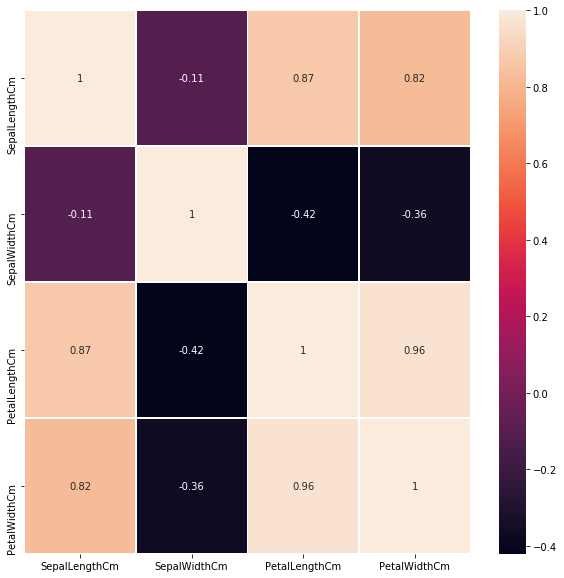

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(iris.corr(), annot=True, linewidths=.5, ax=ax)

Let's also use box and whisker plot to display our input variables.

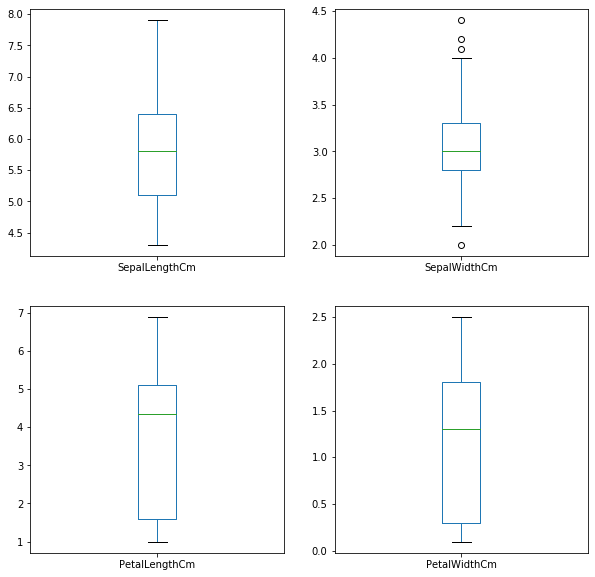

In [12]:
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,10))
plt.show()

Lastly, we plot a scatter matrix as another way to look for any correlation between the input variables.

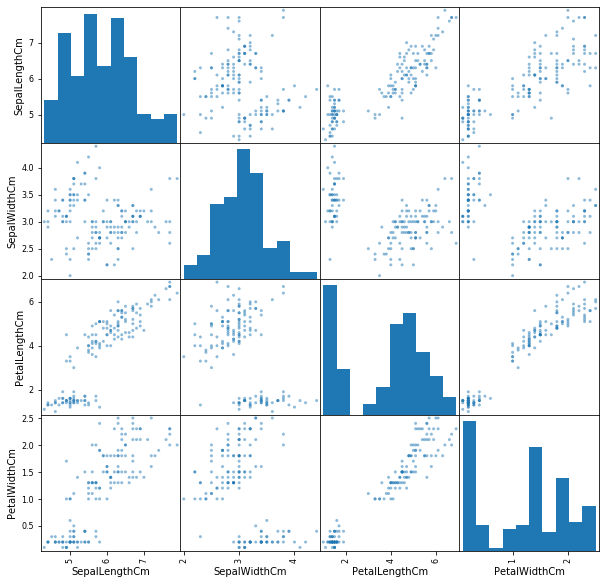

In [13]:
scatter_matrix(iris, figsize=(10,10))
plt.show()

## Step 5: Splitting the dataset
We split data into training and test sets. These two sets are to be used when we build the classification model.

Before we split the dataset into two sets, we first split the dataset into input and target variables, labelled as `X` and `y`, respectively. Remember, we want to classify the observations into Iris species; therefore, the target variable, `y`, will contain the values from the `Species` column. The rest of the columns are input variables.

In [14]:
# Split into input and target variables
X = iris.drop("Species", axis = 1)
y = iris["Species"]

There are several parameters in `train_test_split`.
+ `X` and `y`, which are the input and target variables, respectively.
+ `train_size` and `test_size`, which specifies the proportion of the dataset to be split into training and test sets. We usually use only either one of these two.
+ `random_state`, which ensures that we get the same results everytime we run the code. This is because the function will randomly select the observations to be split. By specifying the argument with any value, we will get the same result no matter how many times we run the code.

In [15]:
# Split into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

As you can see, we split the dataset where 80% of the observations go to the training set. The function produces an output of a list, which we assign to four variables: `X_train`, `X_test`, `y_train` and `y_test`. As the names suggest, these are the training and test sets of input and target variables.

## Step 6: Building the model
We are now going to build our classification model. As mentioned, we will use the logistic regression algorithm for classification.

We first create an instance of the logistic regression model. We save this as `model`.

In [16]:
model = LogisticRegression()

We then fit the model with the training set.

In [17]:
model.fit(X_train, y_train)

LogisticRegression()

Lastly, we create predictions using the test set.

In [18]:
preds = model.predict(X_test)

## Step 7: Model evaluation
We are now going to check the accurayc of our model. We do this using 3 functions: `accuracy_score`, `confusion_matrix` and `classification_report`. We compare the results from the prediction we made earlier (`preds`) with the target variable in the test set(`y_test`).

In [19]:
acc_score = accuracy_score(y_test, preds)
conf_matrix = confusion_matrix(y_test, preds)
class_report = classification_report(y_test, preds)

These lines of code are to print out the results of the previous lines of code. Based on the accuracy score, confusion matrix and classification report, what can you conclude from this analysis? Is our model suitable to be sued for classification of *Iris* species?

In [20]:
print(f"Accuracy score: {acc_score}")
print("------------------")
print("\nConfusion matrix:")
print("-------------------")
print(conf_matrix)
print("----------------------------")
print("\nClassification report:")
print("------------------------")
print(class_report)

Accuracy score: 0.9666666666666667
------------------

Confusion matrix:
-------------------
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
----------------------------

Classification report:
------------------------
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



That is all for data analysis in Python!

# References
Here are several references for further information about data analysis using Python:
+ [Logistic Regression in Python](https://realpython.com/logistic-regression-python/)
+ [Scikit-learn documentation](https://scikit-learn.org/stable/index.html) - you can find many tutorials on machine learning models here
+ [DataCamp Community Tutorials](https://www.datacamp.com/community/tutorials)